## Hùng

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [ ]:
%cd /content/drive/"My Drive"/"Colab Notebooks"/AI4E/

/content/drive/My Drive/Colab Notebooks/AI4E


***1. Implement thuật toán gradient descent tìm giá trị nhỏ nhất hàm $f(x)=x^2$, thử các giá trị learning_rate khác nhau (nhỏ, vừa, lớn, rất lớn), vẽ đồ thị loss function theo epoch tương ứng.***

Solution cost=15.967712, lost= 0.000319
Solution cost=13.070875, lost= 0.026194
Solution cost=2.079475, lost= 0.042438
Solution cost=0.000382, lost= 0.000042


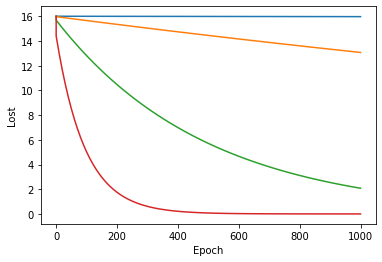

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def df(x):
    return 2*x  

def f(x):
    return x*x

def GD(x0, lr):
    w = [f(x0)]
    epoch=[0]
    for iter in range(1001):
        w_new = w[-1] - lr * df(w[-1])
        cost = w[-1] - w_new
        # if abs(cost) < 1e-10:
        #     break
        if iter%10 == 0:
            w.append(w_new)
            epoch.append(iter)
    plt.plot(epoch,w)
    plt.xlabel('Epoch')
    plt.ylabel('Lost')
    return (w,cost)

(cost,lost) = GD(4, .00001)
print('Solution cost=%f, lost= %f'%(cost[-1], lost))

(cost,lost) = GD(4, .001)
print('Solution cost=%f, lost= %f'%(cost[-1], lost))

(cost,lost) = GD(4, .01)
print('Solution cost=%f, lost= %f'%(cost[-1], lost))

(cost,lost) = GD(4, .05)
print('Solution cost=%f, lost= %f'%(cost[-1], lost))

***2. Tự biểu diễn lại bài toán, bắt đầu từ 1 điểm dữ liệu $(x_i, y_i)$ -> model, loss function, đạo hàm với từng biến. Xong biểu diễn dưới dạng vector. Tính đạo hàm của cả ma trận W với loss function thay vì từng thành phần $w_0, w_1$.***



Model : 

$ \widehat{y} = w_1 * x + w_0$

Loss function:

$L = \frac{1}{2N} \sum_{i=1}^N (\widehat{y_i}-y_i)^2 = \frac{1}{2N} \sum_{i=1}^N (w_1 * x + w_0-y_i)^2$

Derivation:

$\frac{\nabla{L}}{\nabla w_0} = \frac{1}{N} \sum_{i=1}^N (\widehat{y_i}-y_i) =\frac{1}{N} \begin{bmatrix} 1 & 1 & ... & 1 \\\end{bmatrix}$
$\begin{bmatrix} 
\widehat{y_1}-y_1 \\
\widehat{y_2}-y_2\\
...\\
\widehat{y_n}-y_n\\
\end{bmatrix}
\quad
$

\\
$\frac{\nabla{L}}{\nabla w_1} = \frac{1}{N} \sum_{i=1}^N (\widehat{y_i}-y_i)*x_i =
\frac{1}{N} \begin{bmatrix} 
x_1 & x_2 & ... & x_n \\
\end{bmatrix}$$
\begin{bmatrix} 
\widehat{y_1}-y_1 \\
\widehat{y_2}-y_2\\
...\\
\widehat{y_n}-y_n\\
\end{bmatrix}
\quad
$

\\

$\frac{\nabla{L}}{\nabla W} = 
\frac{1}{N} \begin{bmatrix} 
\sum_{i=1}^N (\widehat{y_i}-y_i) \\
\sum_{i=1}^N (\widehat{y_i}-y_i) * x_i
\end{bmatrix}$$
= 
\frac{1}{N} * X^T *(\widehat{Y} - Y)
$

\\


where $X = 
\begin{bmatrix} 
1 & x_1 \\
1 & x_2 \\
... & ...\\
1 & x_n
\end{bmatrix}$
, $ W = \begin{bmatrix} 
w_0\\w_1 
\end{bmatrix}$ ,
 $ \widehat{Y} = X*W = 
 \begin{bmatrix} 
w_0 + x_1 * w_1 \\
w_0 + x_2 * w_1 \\
 ...\\
w_0 + x_n * w_1
\end{bmatrix}
 $


5. [Optional] Biểu diễn bài toán dưới dạng ma trận rồi tìm W để minimize J bằng đại số tuyến tính.

\\

$\frac{\nabla{L}}{\nabla W} = 0$ . Suy ra :
$\frac{1}{N} * X^T(X*W-Y) = 0$

=> $ W = (X^TX)^{-1}X^TY$










3. Hiểu code phần thực hành cho linear regression. Cải tiến code: nhân 1/N ở loss, tính đạo hàm và update cả ma trận W. Vẽ thêm biểu đồ cho loss function theo epoch. Thay đổi các giá trị learning_rate khác nhau xem đồ thị loss trông thế nào.

Text(0.5, 0, 'Epoch')

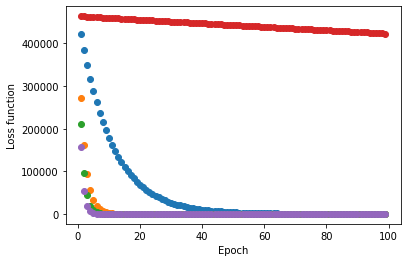

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data_linear.csv').values
N = data.shape[0]
x = data[:,0].reshape(-1,1)
y = data[:,1].reshape(-1,1)

# plt.scatter(x, y)
# plt.xlabel('mét vuông')
# plt.ylabel('giá')

X = np.hstack((np.ones((N,1)),x))
numOfIteration = 100
learning_rate = [.00001,.00005,.00007,.0000001,.00009 ]

for rate in learning_rate:
    W = np.array([0.,1.]).reshape(-1,1)
    cost = np.zeros((numOfIteration,1))
    index_list = [i for i in range(0,100)]
    for i in range(0,numOfIteration):
        y_hat = np.dot(X, W)
        cost[i] = 0.5/N* np.dot((y_hat-y).T,(y_hat-y))
        dW = 1/N * np.dot(X.T, y_hat-y)
        W = W - dW * rate
    plt.scatter(index_list[1:],cost[1:])
plt.ylabel('Loss function')
plt.xlabel('Epoch') 


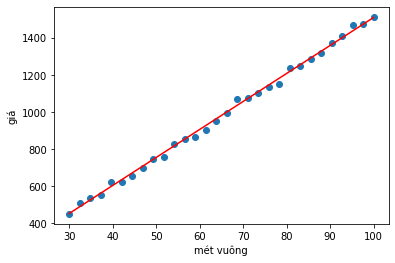

In [ ]:
predict = np.dot(X, W)
plt.plot((X[0][1], X[N-1][1]),(predict[0], predict[N-1]), 'r')
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')
plt.show()

In [ ]:
x1 = 50
y1 = W[0] + W[1] * 50
print('Giá nhà cho 50m^2 là : ', y1)

Giá nhà cho 50m^2 là :  [755.68694501]


4. Dùng thuật toán gradient descent với dữ liệu data_square (để tìm đc parabol khá là tricky)

In [ ]:
# # Hint bài parabol: mọi người in lượng update của dw[0], dw[1], dw[2] 
# # ra sẽ thấy sự khác nhau, nghĩ về chuyện đấy và làm sao để giải quyết.

Thấy rằng :

$\frac{\nabla{L}}{\nabla w_0} = \frac{1}{N} \sum_{i=1}^N (\widehat{y_i}-y_i)$

$\frac{\nabla{L}}{\nabla w_1} = \frac{1}{N} \sum_{i=1}^N (\widehat{y_i}-y_i)*x_i$

$\frac{\nabla{L}}{\nabla w_2} = \frac{1}{N} \sum_{i=1}^N (\widehat{y_i}-y_i)*x_i^2$

$w_0 = w_0 - \frac{\nabla{L}}{\nabla w_0}$ *  learning_rate

$w_1 = w_1 - \frac{\nabla{L}}{\nabla w_0}$ *  learning_rate

$w_2 = w_2 - \frac{\nabla{L}}{\nabla w_0}$ *  learning_rate

Suy ra :

$\frac{\nabla{L}}{\nabla w_1} = \frac{\nabla{L}}{\nabla w_0} * x$

$\frac{\nabla{L}}{\nabla w_2} = \frac{\nabla{L}}{\nabla w_0} * x^2$

Nếu x lớn mà learning_rate cũng lớn thì sẽ bị nhảy số rất lớn 
nên Phương pháp đơn giản nhất là đưa tất cả các thành phần về cùng một khoảng, 
[0,1] hoặc [−1,1]chẳng hạn, tùy thuộc vào ứng dụng. Nếu muốn đưa một thành phần (feature) về khoảng [0,1], công thức sẽ là:

$x' = \frac{x - min(x)}{max(x)-min(x)}$









Text(0, 0.5, 'giá')

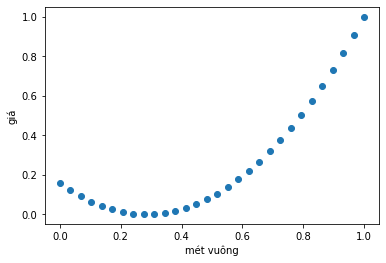

In [ ]:
data = pd.read_csv('data_square.csv').values
N = data.shape[0]
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
x = (x-min(x))/(max(x)-min(x))
y = (y-min(y))/(max(y)-min(y))
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')

$X = \begin{bmatrix} 1 & x_1 &x_1^2 \\1 & x_2 & x_2^2 \\... & ... & ...\\1 & x_n & x_n^2\end{bmatrix}$

$W = \begin{bmatrix} w_0 \\ w_1\\w_2\end{bmatrix}$



In [ ]:
x0 = np.ones(x.shape)
x1 = x
x2 = np.square(x)

Text(0.5, 0, 'Epoch')

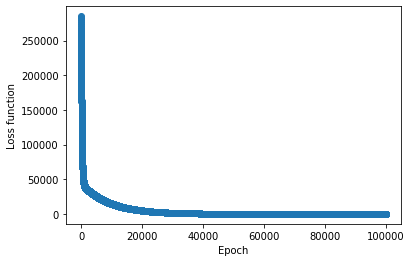

In [ ]:
X = np.concatenate([x0,x1,x2],axis=1)      # initial X
W = np.random.rand(3,1)%10              # initial W

numOfIteration = 100000
cost = np.zeros((numOfIteration,1))
index_list = [i for i in range(0,numOfIteration)]
learning_rate = 0.0006

for i in range(0,numOfIteration):
    y_hat = np.dot(X, W) 
    cost[i] = 0.5/N*np.squeeze(np.dot((y_hat-y).T,(y_hat-y)))
    # K = np.dot((y_hat-y).T,(y_hat-y))
    dW = np.dot(X.T, y_hat-y)
    W = W - dW * learning_rate
    # if i%10000 ==1: 
    #     print(cost[i].shape)
        # print(K.shape)

plt.scatter(index_list,cost)
plt.ylabel('Loss function')
plt.xlabel('Epoch') 

In [ ]:
W

array([[ -102.7054142 ],
       [-2784.4636314 ],
       [ 4885.04652877]])

<function matplotlib.pyplot.show>

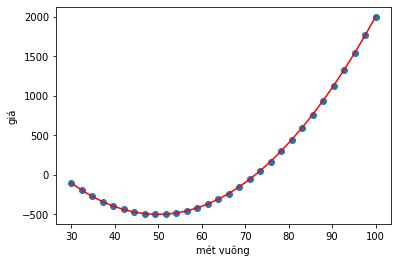

In [ ]:
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y)
plt.xlabel('mét vuông')

plt.ylabel('giá')
x_pred = x
y_pred = np.dot(X, W)
plt.plot(x_pred,y_pred,c='r')
plt.show